<a href="https://colab.research.google.com/github/jagtapuday/Computer-Vision/blob/master/CNN_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Creating a Convnet

Now it is time to create our first convnet! This example is for the purpose of getting familiar with CNN architectures, we will talk about how to improves its performance later.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/cnn*

###Dataset
The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class. 

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.




In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

#Normalize pixel values to be between 0-1
train_images=train_images/255.0
test_images=test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 5s 0us/step


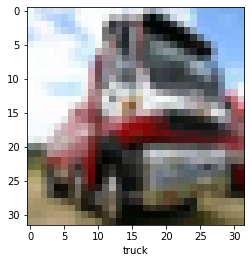

In [8]:
plt.imshow(train_images[3006],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[3006][0]])
plt.show()

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

history=model.fit(train_images,train_labels,epochs=4,validation_data=(test_images,test_labels))

Epoch 1/4
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5132 - accuracy: 0.4484 - val_loss: 1.2582 - val_accuracy: 0.5516
Epoch 2/4
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1421 - accuracy: 0.5978 - val_loss: 1.0657 - val_accuracy: 0.6205
Epoch 3/4
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0020 - accuracy: 0.6469 - val_loss: 0.9929 - val_accuracy: 0.6512
Epoch 4/4
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9060 - accuracy: 0.6807 - val_loss: 0.9361 - val_accuracy: 0.6704


In [14]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
test_acc

313/313 - 3s - loss: 0.9361 - accuracy: 0.6704


0.6704000234603882

# Data Augmentation

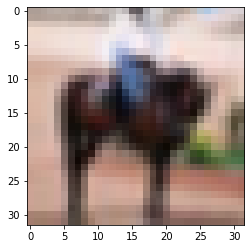

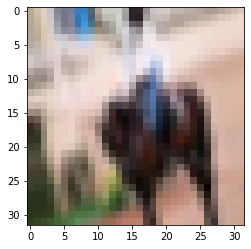

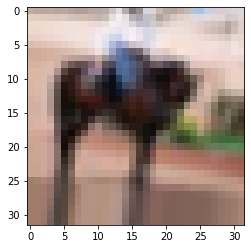

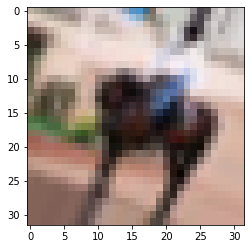

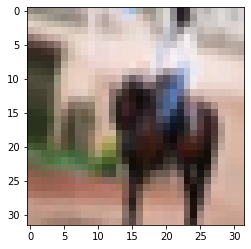

In [23]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[11]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()


#Using a Pretrained Model

In [24]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [25]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteKJLF07/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


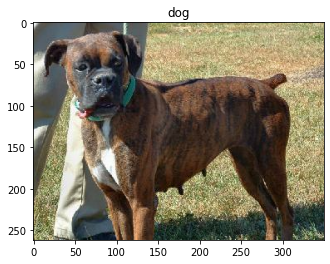

In [27]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(1):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [28]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [29]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

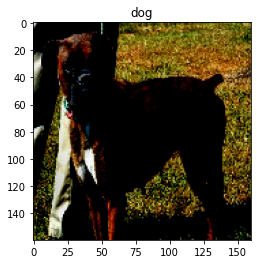

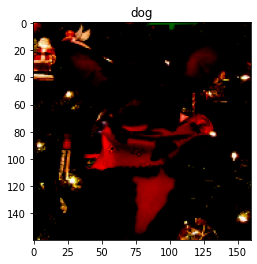

In [30]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [31]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [32]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


In [33]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

In [35]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


#Freezing the Base

In [36]:
base_model.trainable = False

In [ ]:
base_model.summary()

#Adding our Classifier

In [38]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [39]:
prediction_layer = keras.layers.Dense(1)

In [40]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


#Training the Model

In [42]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 2
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 11s 563ms/step - loss: 0.5602 - accuracy: 0.6938


In [47]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/2
582/582 [==============================] - 388s 666ms/step - loss: 0.1991 - accuracy: 0.9148 - val_loss: 0.0859 - val_accuracy: 0.9716
Epoch 2/2
582/582 [==============================] - 389s 669ms/step - loss: 0.0753 - accuracy: 0.9740 - val_loss: 0.0615 - val_accuracy: 0.9785
[0.9147769808769226, 0.9739924669265747]


In [48]:
model.save("dogs_vs_cats.h5")  # we can save the model and reload it at anytime in the future
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

In [50]:
new_model.predict(test_images)

array([[-2.1441374 ],
       [ 1.5038142 ],
       [ 1.0500449 ],
       ...,
       [ 0.24418506],
       [ 0.95275605],
       [ 0.3477159 ]], dtype=float32)

In [88]:
prediction = new_model.predict(np.array([test_images[1]]))
prediction

array([[1.5038129]], dtype=float32)

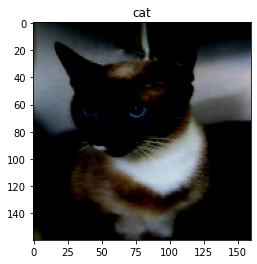

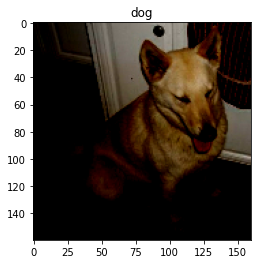

In [54]:
for image, label in test.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

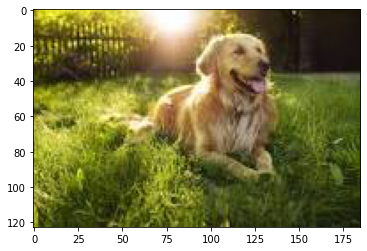

In [100]:
from keras.preprocessing import image
test_image = image.load_img('Dog1.jpg')
test_image=np.array(test_image)
plt.figure()
plt.imshow(test_image)
plt.show()

(160, 160, 3)


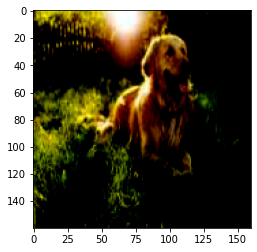

In [95]:
# dog,lab=format_example(test_image, 'dog')
image = tf.cast(test_image, tf.float32)
image = (image/127.5) - 1
image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

print(image.shape)
plt.figure()
plt.imshow(image)
plt.show()

In [97]:
prediction = new_model.predict(np.array([image]))
prediction

array([[6.1643586]], dtype=float32)

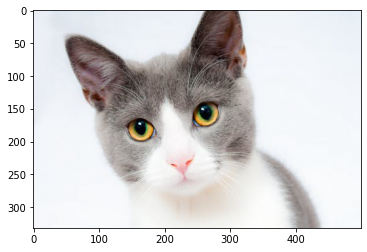

In [102]:
test_image = image.load_img('cat1.jpeg')
test_image=np.array(test_image)
plt.figure()
plt.imshow(test_image)
plt.show()

(160, 160, 3)


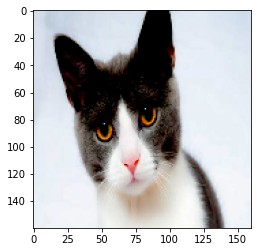

In [103]:
image = tf.cast(test_image, tf.float32)
image = (image/127.5) - 1
image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

print(image.shape)
plt.figure()
plt.imshow(image)
plt.show()

In [104]:
prediction = new_model.predict(np.array([image]))
prediction

array([[-6.813385]], dtype=float32)

In [ ]:
#Prediction <0 then it's Cat else Dog